# Load the Dataset

In [20]:
import numpy as np

data = np.genfromtxt('datasets/Data_Cortex_Nuclear.csv',delimiter=',',
                     skip_header=1,usecols=range(1,78),filling_values=0)
classes = np.genfromtxt('datasets/Data_Cortex_Nuclear.csv',delimiter=',',
                        skip_header=1,usecols=range(78,81),dtype=None)

Separate target and background datasets:
* Target consists of mice that have been stimulated by shock therapy. Some have Down Syndrome, others don't, but we assume this label is not known to us *a priori*
* Background consists of mice that have not been stimulated by shock therapy, and do not have Down Syndrome

In [59]:
target_idx_A = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))[0]
target_idx_B = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Ts65Dn'))[0]

labels = len(target_idx_A)*[0] + len(target_idx_B)*[1]
target_idx = np.concatenate((target_idx_A,target_idx_B))                                                                          

target = data[target_idx]

background_idx = np.where((classes[:,-1]==b'C/S') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))
background = data[background_idx]

# Run Contrastive PCA

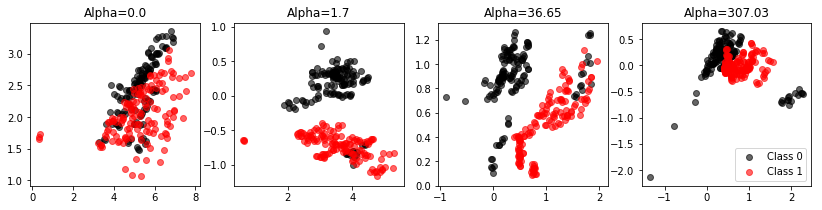

In [64]:
from contrastive import CPCA

mdl = CPCA()
projected_data = mdl.fit_transform(target, background, plot=True, active_labels=labels)

### GUI

Try using our GUI to sweep different values of $\alpha$. To see an example of how such an animation can be used to reveal clusters within the data, check out an [example on our Github repo](https://github.com/abidlabs/contrastive)!

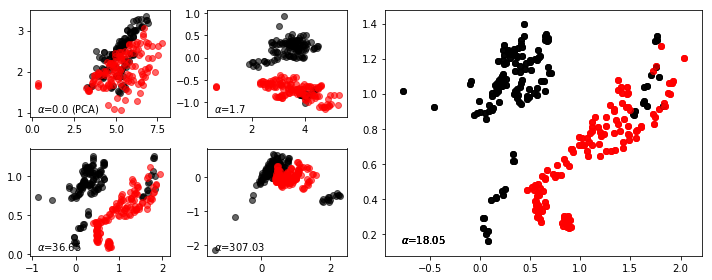

In [66]:
projected_data = mdl.fit_transform(target, background, gui=True, active_labels=labels)